# KIAM8

End-to-End Insurance Risk Analytics & Predictive Modeling

1.1 Git and GitHub

●	Tasks: 

    ●	Create a git repository for the week with a good README

        ●	Git version control 

        ●	CI/CD with GitHub Actions

    ●	Key Performance Indicators (KPIs):

        ●	Dev Environment Setup.

        ●	Relevant skill in the area demonstrated.


1.2 Project Planning - EDA & Stats

    ●	Develop a foundational understanding of the data, assess its quality, and uncover initial patterns in risk and profitability

    ●	Tasks: 

        ●	Data Understanding

        ●	Exploratory Data Analysis (EDA)

        ●	Guiding Questions:

            ■	What is the overall Loss Ratio (TotalClaims / TotalPremium) for the portfolio? How does it vary by Province, VehicleType, and Gender?

            ■	What are the distributions of key financial variables? Are there outliers in TotalClaims or CustomValueEstimate that could skew our analysis?

            ■	Are there temporal trends? Did the claim frequency or severity change over the 18-month period?

            ■	Which vehicle makes/models are associated with the highest and lowest claim amounts?

        ●	Statistical thinking

        ●	KPIs:

            ●	Proactivity to self-learn - sharing references.

            ●	EDA techniques to understand data and discover insights,

            ●	Demonstrating Stats understanding by using suitable statistical distributions and plots to provide evidence for actionable insights gained from EDA.


In [1]:
# Import Important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Import data

file='../Data/MachineLearningRating_v3.txt'

df=pd.read_csv(file,sep='|')

C:\Users\henokt\AppData\Local\Temp\ipykernel_7808\3210468461.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file,sep='|')


In [3]:
# Examine the Loaded Data
df.head()

UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Windscreen    Windscreen   
1  Current account  ...             Mobility - Windscreen    Windscreen   
2  Current account  ...             Mobility - Windscreen    Windscreen   
3  Current account  ...  Mobility - Metered Taxis - R2000    Own damage   
4  Current account  ...  Mobility - Metered Taxis - R2000    Own damage   

    CoverType            CoverGroup              Section  \
0  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
1  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
2  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
3  Own Damage  Comprehensive - Taxi  Motor Comprehensive   
4  Own Damage  Comprehensive - Taxi  Motor Comprehensive   

                           Product StatutoryClass StatutoryRiskType  \
0  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
1  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
2  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
3  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
4  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   

   TotalPremium TotalClaims  
0     21.929825         0.0  
1     21.929825         0.0  
2      0.000000         0.0  
3    512.848070         0.0  
4      0.000000         0.0  

[5 rows x 52 columns]

In [4]:
import sys
import os

# --- Path Setup to find the 'scripts' folder ---

# 1. Get the current working directory (e.g., /Project_Folder/Notebooks)

current_dir = os.getcwd()

# 2. Navigate UP one directory ('..') and then INTO 'scripts'
# The abspath function resolves the '..' and gives the full, reliable path.

relative_scripts_path = os.path.join(current_dir, '..', 'scripts')
scripts_path = os.path.abspath(relative_scripts_path)

# 3. Add the 'scripts' folder path to Python's system path
if scripts_path not in sys.path and os.path.isdir(scripts_path):
    sys.path.append(scripts_path)
    print(f"Added scripts folder:")
else:
    print("Scripts folder is already in path or not found.")


Added scripts folder:


In [5]:
# Import the Pre_Processor Script 

date_columns = ['TransactionMonth', 'VehicleIntroDate']

import Pre_Processor

clean_df = Pre_Processor.cleaner(df,date_columns)

🧹 Preprocessing data...
✅ Finished Cleaning data...

⏰ Converting specified columns to date objects...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\End-to-End_Insurance_Risk_Analytics-and-Predictive_Modeling\scripts\Pre_Processor.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp_df[col] = pd.to_datetime(temp_df[col], errors='coerce')



📊 Categorical Columns: 34
📈 Numerical Columns: 15
📅 Converted Date Columns (now 'object' dtype): 2


In [6]:
# Descriptive statistics for numerical features

categorical_cols = clean_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = clean_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("="*60)
print("DESCRIPTIVE STATISTICS - NUMERICAL FEATURES")
print("="*60)

numerical_stats = clean_df[numerical_cols].describe()
display(numerical_stats)

DESCRIPTIVE STATISTICS - NUMERICAL FEATURES


UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.000000   
25%        2.008000e+03       4.000000    2237.000000      75.000000   
50%        2.011000e+03       4.000000    2694.000000     111.000000   
75%        2.013000e+03       4.000000    2694.000000     111.000000   
max        2.015000e+03      10.000000   12880.000000     309.000000   

       NumberOfDoors  CustomValueEstimate  NumberOfVehiclesInFleet  \
count  999546.000000         2.204560e+05                      0.0   
mean        4.019250         2.255311e+05                      NaN   
std         0.468314         5.645157e+05                      NaN   
min         0.000000         2.000000e+04                      NaN   
25%         4.000000         1.350000e+05                      NaN   
50%         4.000000         2.200000e+05                      NaN   
75%         4.000000         2.800000e+05                      NaN   
max         6.000000         2.655000e+07                      NaN   

         SumInsured  CalculatedPremiumPerTerm  TotalPremium   TotalClaims  
count  1.000098e+06              1.000098e+06  1.000098e+06  1.000098e+06  
mean   6.041727e+05              1.178757e+02  6.190550e+01  6.486119e+01  
std    1.508332e+06              3.997017e+02  2.302845e+02  2.384075e+03  
min    1.000000e-02              0.000000e+00 -7.825768e+02 -1.200241e+04  
25%    5.000000e+03              3.224800e+00  0.000000e+00  0.000000e+00  
50%    7.500000e+03              8.436900e+00  2.178333e+00  0.000000e+00  
75%    2.500000e+05              9.000000e+01  2.192982e+01  0.000000e+00  
max    1.263620e+07              7.442217e+04  6.528260e+04  3.930921e+05

In [7]:
clean_df.head()

UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01             True   
1               145249     12827       2015-05-01             True   
2               145249     12827       2015-07-01             True   
3               145255     12827       2015-05-01             True   
4               145255     12827       2015-07-01             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Windscreen    Windscreen   
1  Current account  ...             Mobility - Windscreen    Windscreen   
2  Current account  ...             Mobility - Windscreen    Windscreen   
3  Current account  ...  Mobility - Metered Taxis - R2000    Own damage   
4  Current account  ...  Mobility - Metered Taxis - R2000    Own damage   

    CoverType            CoverGroup              Section  \
0  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
1  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
2  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
3  Own Damage  Comprehensive - Taxi  Motor Comprehensive   
4  Own Damage  Comprehensive - Taxi  Motor Comprehensive   

                           Product StatutoryClass StatutoryRiskType  \
0  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
1  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
2  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
3  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
4  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   

   TotalPremium TotalClaims  
0     21.929825         0.0  
1     21.929825         0.0  
2      0.000000         0.0  
3    512.848070         0.0  
4      0.000000         0.0  

[5 rows x 52 columns]

In [8]:
# Additional statistics
print("\n" + "="*60)
print("ADDITIONAL STATISTICS")
print("="*60)
additional_stats = pd.DataFrame({
    'Skewness': clean_df[numerical_cols].skew(),
    'Kurtosis': clean_df[numerical_cols].kurtosis(),
    'Variance': clean_df[numerical_cols].var()
})
display(additional_stats.head(10))


ADDITIONAL STATISTICS


Skewness     Kurtosis      Variance
UnderwrittenCoverID   0.611710     0.028837  4.006094e+09
PolicyID              0.737428     0.281970  2.798451e+07
PostalCode            0.799472    -0.636058  7.021728e+06
mmcode               -2.609235     5.615633  1.850635e+14
RegistrationYear     -0.794487     0.608084  1.063667e+01
Cylinders             5.704635    71.285271  8.644783e-02
cubiccapacity         3.576025   102.289803  1.960724e+05
kilowatts             0.244719     3.009992  3.760984e+02
NumberOfDoors        -2.531328    18.833823  2.193184e-01
CustomValueEstimate  40.870518  1762.321550  3.186780e+11

In [9]:
# Calculate key financial metrics
print("="*80)
print("KEY FINANCIAL METRICS")
print("="*80)

total_premium = clean_df['TotalPremium'].sum()
total_claims = clean_df['TotalClaims'].sum()
overall_loss_ratio = total_claims / total_premium

print(f"Total Premium Collected: R {total_premium:,.2f}")
print(f"Total Claims Paid: R {total_claims:,.2f}")
print(f"Overall Loss Ratio: {overall_loss_ratio:.2%}")
print(f"Profit/Loss: R {(total_premium - total_claims):,.2f}")

print(f"\nAverage Premium per Policy: R {clean_df['TotalPremium'].mean():,.2f}")
print(f"Median Premium per Policy: R {clean_df['TotalPremium'].median():,.2f}")
print(f"Average Claim per Policy: R {clean_df['TotalClaims'].mean():,.2f}")
print(f"Median Claim per Policy: R {clean_df['TotalClaims'].median():,.2f}")

print(f"\nPolicies with Claims: {(clean_df['TotalClaims'] > 0).sum():,} ({(clean_df['TotalClaims'] > 0).mean()*100:.2f}%)")
print(f"Policies without Claims: {(clean_df['TotalClaims'] == 0).sum():,} ({(clean_df['TotalClaims'] == 0).mean()*100:.2f}%)")

print("="*80)

KEY FINANCIAL METRICS
Total Premium Collected: R 61,911,562.70
Total Claims Paid: R 64,867,546.17
Overall Loss Ratio: 104.77%
Profit/Loss: R -2,955,983.47

Average Premium per Policy: R 61.91
Median Premium per Policy: R 2.18
Average Claim per Policy: R 64.86
Median Claim per Policy: R 0.00

Policies with Claims: 2,788 (0.28%)
Policies without Claims: 997,305 (99.72%)


MISSING VALUES ANALYSIS


Column  Missing_Count  \
NumberOfVehiclesInFleet  NumberOfVehiclesInFleet        1000098   
CrossBorder                          CrossBorder         999400   
CustomValueEstimate          CustomValueEstimate         779642   
WrittenOff                            WrittenOff         641901   
Converted                              Converted         641901   
Rebuilt                                  Rebuilt         641901   
NewVehicle                            NewVehicle         153295   
Bank                                        Bank         145961   
AccountType                          AccountType          40232   
Gender                                    Gender           9536   
MaritalStatus                      MaritalStatus           8259   
mmcode                                    mmcode            552   
VehicleType                          VehicleType            552   
make                                        make            552   
VehicleIntroDate                VehicleIntroDate            552   
NumberOfDoors                      NumberOfDoors            552   
bodytype                                bodytype            552   
kilowatts                              kilowatts            552   
cubiccapacity                      cubiccapacity            552   
Cylinders                              Cylinders            552   
Model                                      Model            552   
CapitalOutstanding            CapitalOutstanding              2   

                         Missing_Percentage       Data_Type  
NumberOfVehiclesInFleet          100.000000         float64  
CrossBorder                       99.930207          object  
CustomValueEstimate               77.956560         float64  
WrittenOff                        64.183810          object  
Converted                         64.183810          object  
Rebuilt                           64.183810          object  
NewVehicle                        15.327998          object  
Bank                              14.594670          object  
AccountType                        4.022806          object  
Gender                             0.953507          object  
MaritalStatus                      0.825819          object  
mmcode                             0.055195         float64  
VehicleType                        0.055195          object  
make                               0.055195          object  
VehicleIntroDate                   0.055195  datetime64[ns]  
NumberOfDoors                      0.055195         float64  
bodytype                           0.055195          object  
kilowatts                          0.055195         float64  
cubiccapacity                      0.055195         float64  
Cylinders                          0.055195         float64  
Model                              0.055195          object  
CapitalOutstanding                 0.000200          object

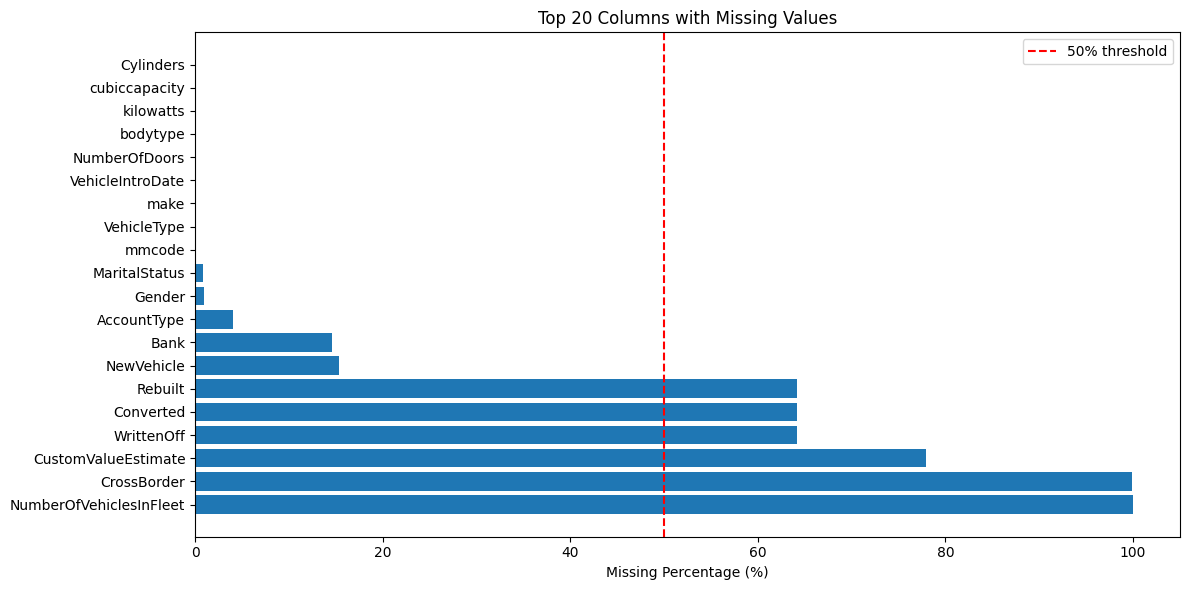


Overall Missing Data: 9.74%


In [10]:
# Comprehensive missing values analysis
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing_data = pd.DataFrame({
    'Column': clean_df.columns,
    'Missing_Count': clean_df.isnull().sum(),
    'Missing_Percentage': (clean_df.isnull().sum() / len(clean_df)) * 100,
    'Data_Type': clean_df.dtypes
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

if len(missing_data) > 0:
    display(missing_data)
    
    # Visualize missing data
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.barh(missing_data['Column'][:20], missing_data['Missing_Percentage'][:20])
    ax.set_xlabel('Missing Percentage (%)')
    ax.set_title('Top 20 Columns with Missing Values')
    ax.axvline(x=50, color='r', linestyle='--', label='50% threshold')
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values found!")

# Overall missing percentage
overall_missing = (clean_df.isnull().sum().sum() / (clean_df.shape[0] * clean_df.shape[1])) * 100
print(f"\nOverall Missing Data: {overall_missing:.2f}%")

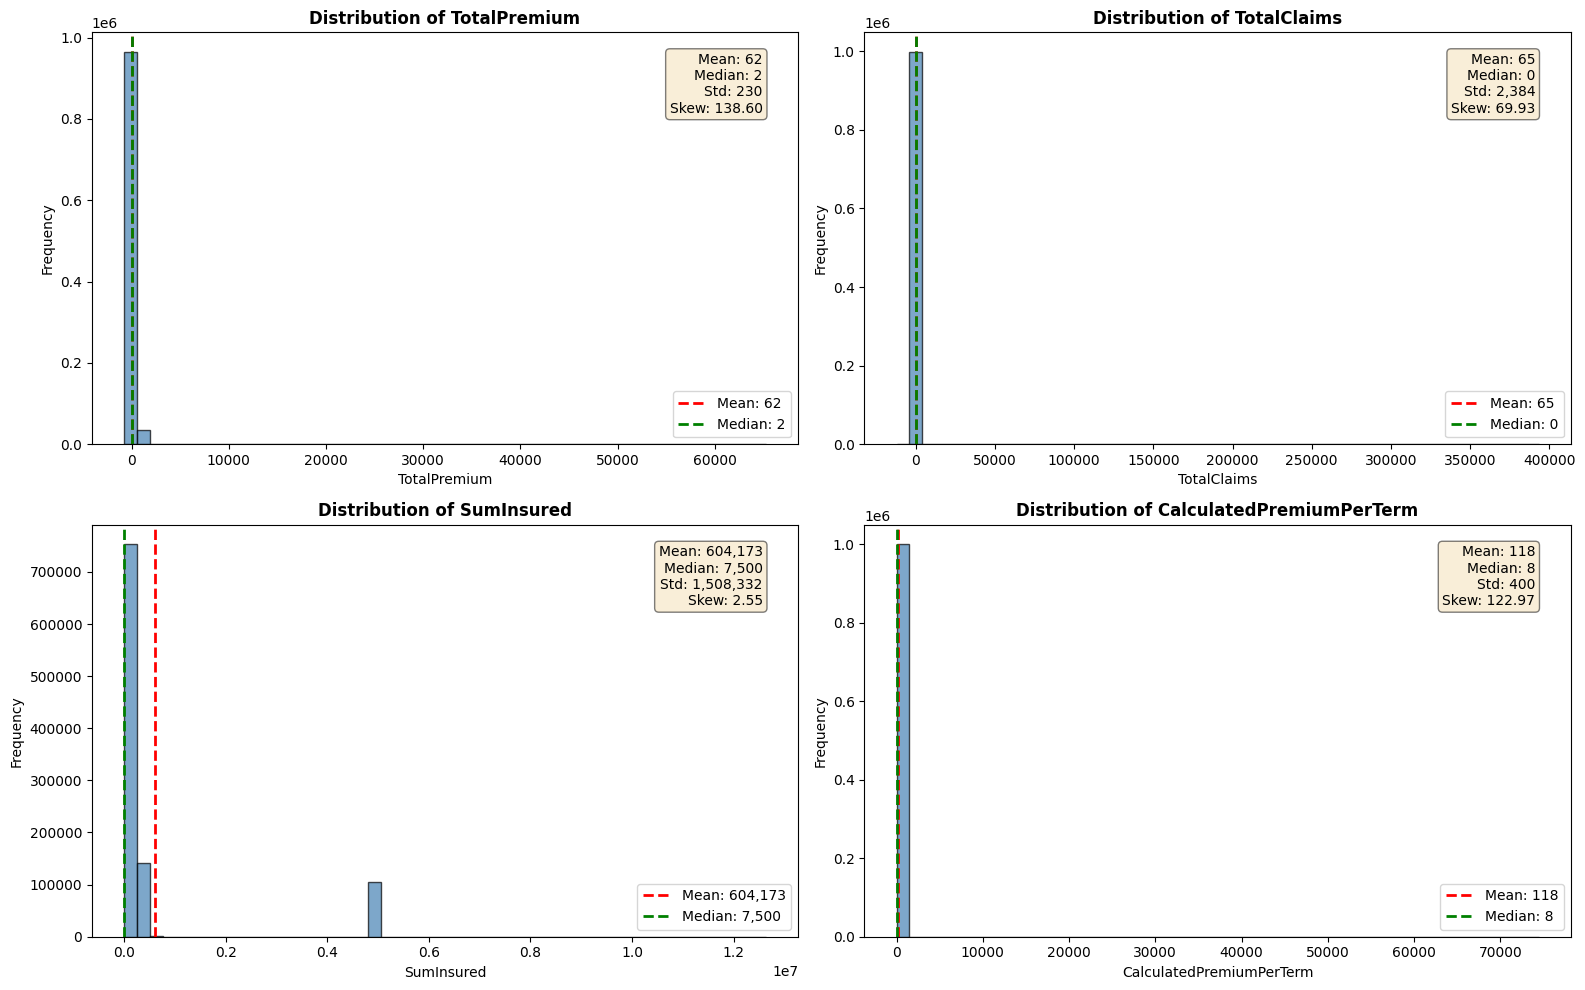

In [11]:
# Distribution of key numerical variables
key_numerical = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    if col in clean_df.columns:
        data = clean_df[col].dropna()
        
        # Histogram
        axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        
        # Add statistics
        mean_val = data.mean()
        median_val = data.median()
        std_val = data.std()
        
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:,.0f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:,.0f}')
        
        # Add text box with stats
        textstr = f'Mean: {mean_val:,.0f}\nMedian: {median_val:,.0f}\nStd: {std_val:,.0f}\nSkew: {data.skew():.2f}'
        axes[idx].text(0.95, 0.95, textstr, transform=axes[idx].transAxes,
                      verticalalignment='top', horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        axes[idx].legend()

plt.tight_layout()
plt.show()

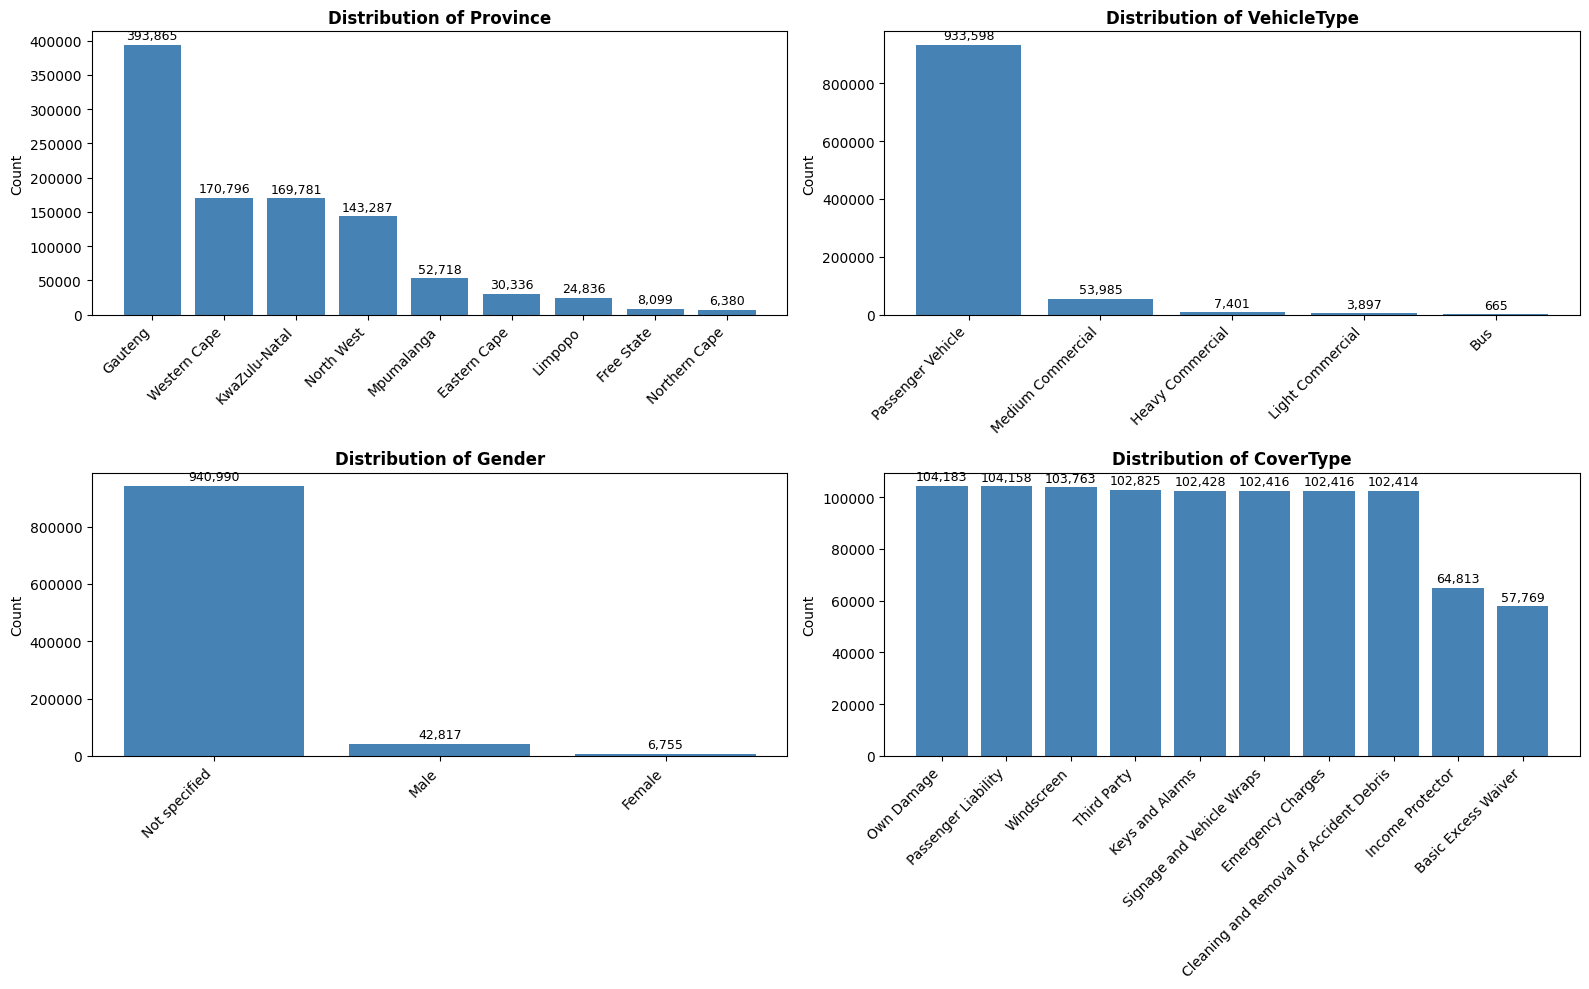


Province - Top 10:
Province
Gauteng          393865
Western Cape     170796
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Eastern Cape      30336
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64
Unique values: 9

VehicleType - Top 10:
VehicleType
Passenger Vehicle    933598
Medium Commercial     53985
Heavy Commercial       7401
Light Commercial       3897
Bus                     665
Name: count, dtype: int64
Unique values: 5

Gender - Top 10:
Gender
Not specified    940990
Male              42817
Female             6755
Name: count, dtype: int64
Unique values: 3

CoverType - Top 10:
CoverType
Own Damage                                 104183
Passenger Liability                        104158
Windscreen                                 103763
Third Party                                102825
Keys and Alarms                            102428
Signage and Vehicle Wraps                  102416
Emergency Charges      

In [12]:
# Distribution of key categorical variables
categorical_to_plot = ['Province', 'VehicleType', 'Gender', 'CoverType']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_to_plot):
    if col in clean_df.columns:
        value_counts = clean_df[col].value_counts().head(10)
        
        axes[idx].bar(range(len(value_counts)), value_counts.values, color='steelblue')
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Count')
        
        # Add value labels on bars
        for i, v in enumerate(value_counts.values):
            axes[idx].text(i, v + max(value_counts.values)*0.01, f'{v:,}', 
                          ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print value counts
for col in categorical_to_plot:
    if col in clean_df.columns:
        print(f"\n{col} - Top 10:")
        print(clean_df[col].value_counts().head(10))
        print(f"Unique values: {clean_df[col].nunique()}")

LOSS RATIO BY PROVINCE


Province  TotalPremium   TotalClaims  PolicyCount  LossRatio  \
2        Gauteng  2.405377e+07  2.939415e+07       393865   1.222018   
3  KwaZulu-Natal  1.320908e+07  1.430138e+07       169781   1.082693   
8   Western Cape  9.806559e+06  1.038977e+07       170796   1.059472   
6     North West  7.490508e+06  5.920250e+06       143287   0.790367   
5     Mpumalanga  2.836292e+06  2.044675e+06        52718   0.720897   
1     Free State  5.213632e+05  3.549223e+05         8099   0.680758   
4        Limpopo  1.537324e+06  1.016477e+06        24836   0.661199   
0   Eastern Cape  2.140104e+06  1.356427e+06        30336   0.633813   
7  Northern Cape  3.165581e+05  8.949051e+04         6380   0.282699   

   AvgPremium   AvgClaim  
2   61.071115  74.630009  
3   77.800695  84.234293  
8   57.416793  60.831482  
6   52.276258  41.317426  
5   53.801205  38.785147  
1   64.373780  43.822975  
4   61.899038  40.927553  
0   70.546672  44.713432  
7   49.617253  14.026726

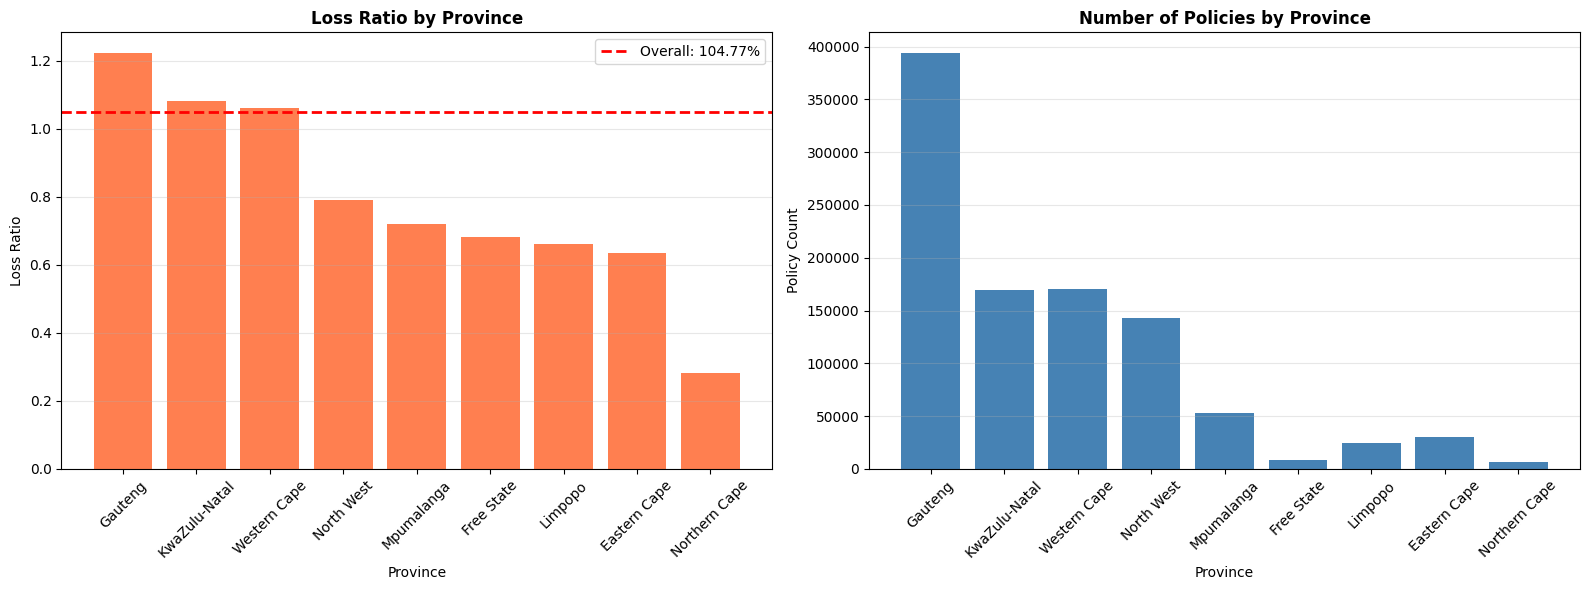

In [23]:
# Calculate Loss Ratio by Province
loss_by_province = clean_df.groupby('Province').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

loss_by_province.columns = ['Province', 'TotalPremium', 'TotalClaims', 'PolicyCount']
loss_by_province['LossRatio'] = loss_by_province['TotalClaims'] / loss_by_province['TotalPremium']
loss_by_province['AvgPremium'] = loss_by_province['TotalPremium'] / loss_by_province['PolicyCount']
loss_by_province['AvgClaim'] = loss_by_province['TotalClaims'] / loss_by_province['PolicyCount']

loss_by_province = loss_by_province.sort_values('LossRatio', ascending=False)

print("="*80)
print("LOSS RATIO BY PROVINCE")
print("="*80)
display(loss_by_province)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Loss Ratio by Province
axes[0].bar(loss_by_province['Province'], loss_by_province['LossRatio'], color='coral')
axes[0].axhline(y=overall_loss_ratio, color='red', linestyle='--', linewidth=2, 
                label=f'Overall: {overall_loss_ratio:.2%}')
axes[0].set_xlabel('Province')
axes[0].set_ylabel('Loss Ratio')
axes[0].set_title('Loss Ratio by Province', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Policy Count by Province
axes[1].bar(loss_by_province['Province'], loss_by_province['PolicyCount'], color='steelblue')
axes[1].set_xlabel('Province')
axes[1].set_ylabel('Policy Count')
axes[1].set_title('Number of Policies by Province', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

LOSS RATIO BY VEHICLE TYPE


VehicleType  TotalPremium   TotalClaims  PolicyCount  LossRatio  \
1   Heavy Commercial  4.609479e+05  7.504746e+05         7401   1.628112   
3  Medium Commercial  3.922746e+06  4.119867e+06        53985   1.050251   
4  Passenger Vehicle  5.664202e+07  5.937207e+07       933598   1.048198   
2   Light Commercial  2.604975e+05  6.045250e+04         3897   0.232066   
0                Bus  5.824474e+04  7.996535e+03          665   0.137292   

   AvgPremium  
1   62.281835  
3   72.663620  
4   60.670670  
2   66.845656  
0   87.586075

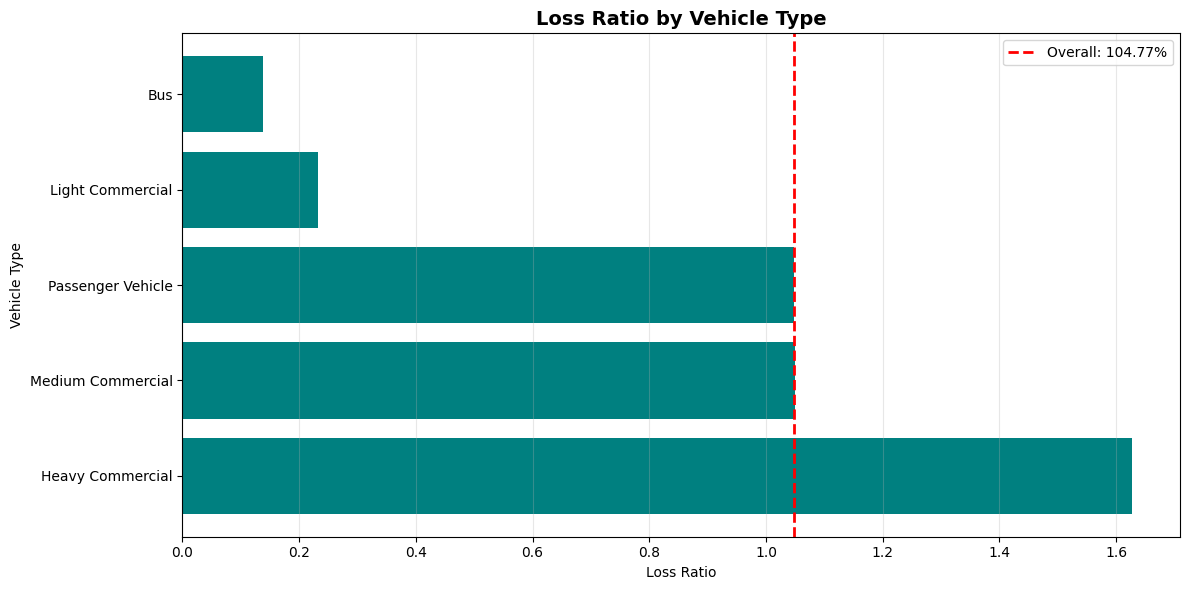

In [13]:
# Calculate Loss Ratio by Vehicle Type
loss_by_vehicle = clean_df.groupby('VehicleType').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

loss_by_vehicle.columns = ['VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
loss_by_vehicle['LossRatio'] = loss_by_vehicle['TotalClaims'] / loss_by_vehicle['TotalPremium']
loss_by_vehicle['AvgPremium'] = loss_by_vehicle['TotalPremium'] / loss_by_vehicle['PolicyCount']

loss_by_vehicle = loss_by_vehicle.sort_values('LossRatio', ascending=False)

print("="*80)
print("LOSS RATIO BY VEHICLE TYPE")
print("="*80)
display(loss_by_vehicle)

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(loss_by_vehicle['VehicleType'], loss_by_vehicle['LossRatio'], color='teal')
plt.axvline(x=overall_loss_ratio, color='red', linestyle='--', linewidth=2,
            label=f'Overall: {overall_loss_ratio:.2%}')
plt.xlabel('Loss Ratio')
plt.ylabel('Vehicle Type')
plt.title('Loss Ratio by Vehicle Type', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

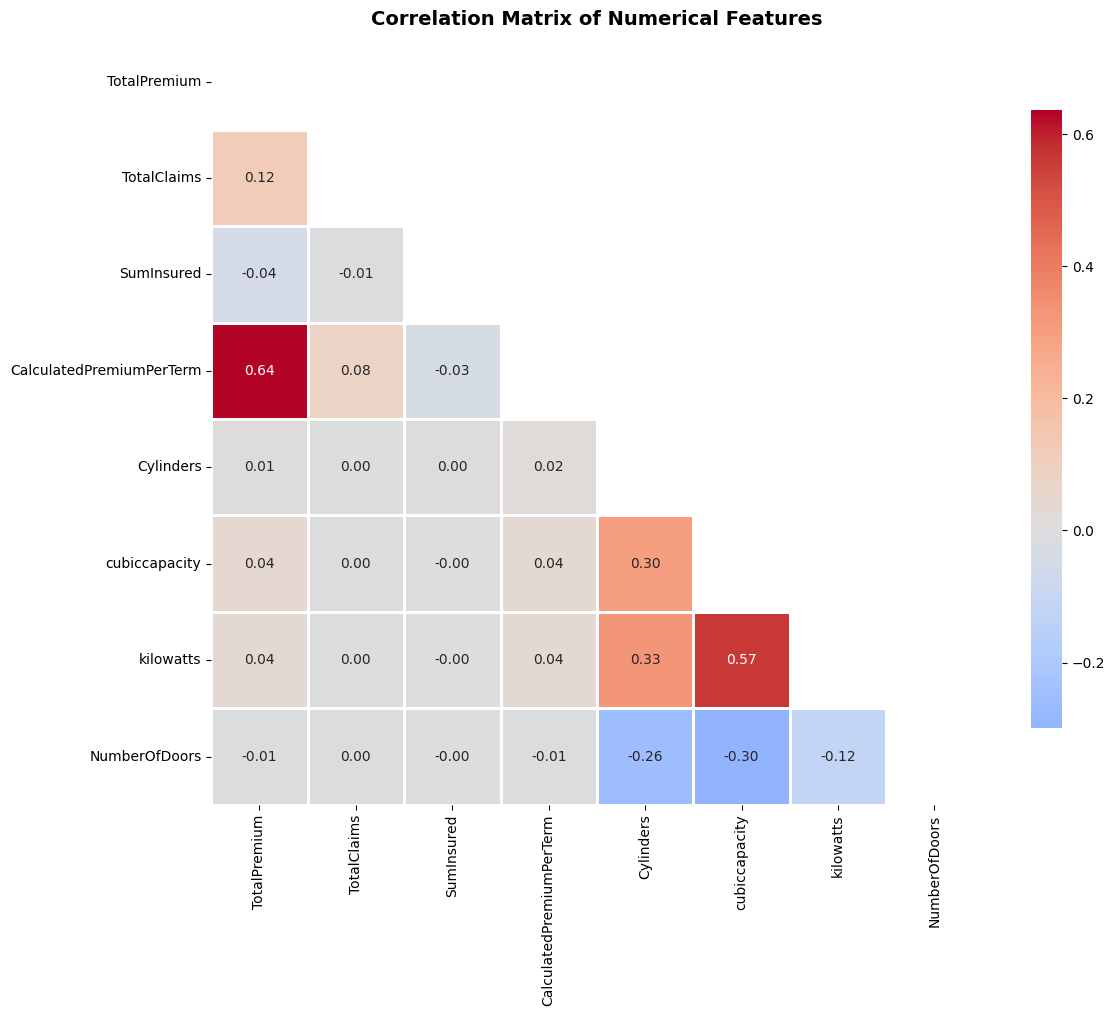


STRONG CORRELATIONS (|r| > 0.5)
TotalPremium <-> CalculatedPremiumPerTerm: 0.636
cubiccapacity <-> kilowatts: 0.567


In [14]:
# Correlation matrix for numerical features
numerical_features = ['TotalPremium', 'TotalClaims', 'SumInsured', 
                      'CalculatedPremiumPerTerm', 'Cylinders', 'cubiccapacity', 
                      'kilowatts', 'NumberOfDoors']

# Select only existing columns
available_features = [col for col in numerical_features if col in clean_df.columns]
correlation_data = clean_df[available_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_data, dtype=bool))
sns.heatmap(correlation_data, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print strong correlations
print("\n" + "="*60)
print("STRONG CORRELATIONS (|r| > 0.5)")
print("="*60)
for i in range(len(correlation_data.columns)):
    for j in range(i+1, len(correlation_data.columns)):
        if abs(correlation_data.iloc[i, j]) > 0.5:
            print(f"{correlation_data.columns[i]} <-> {correlation_data.columns[j]}: {correlation_data.iloc[i, j]:.3f}")

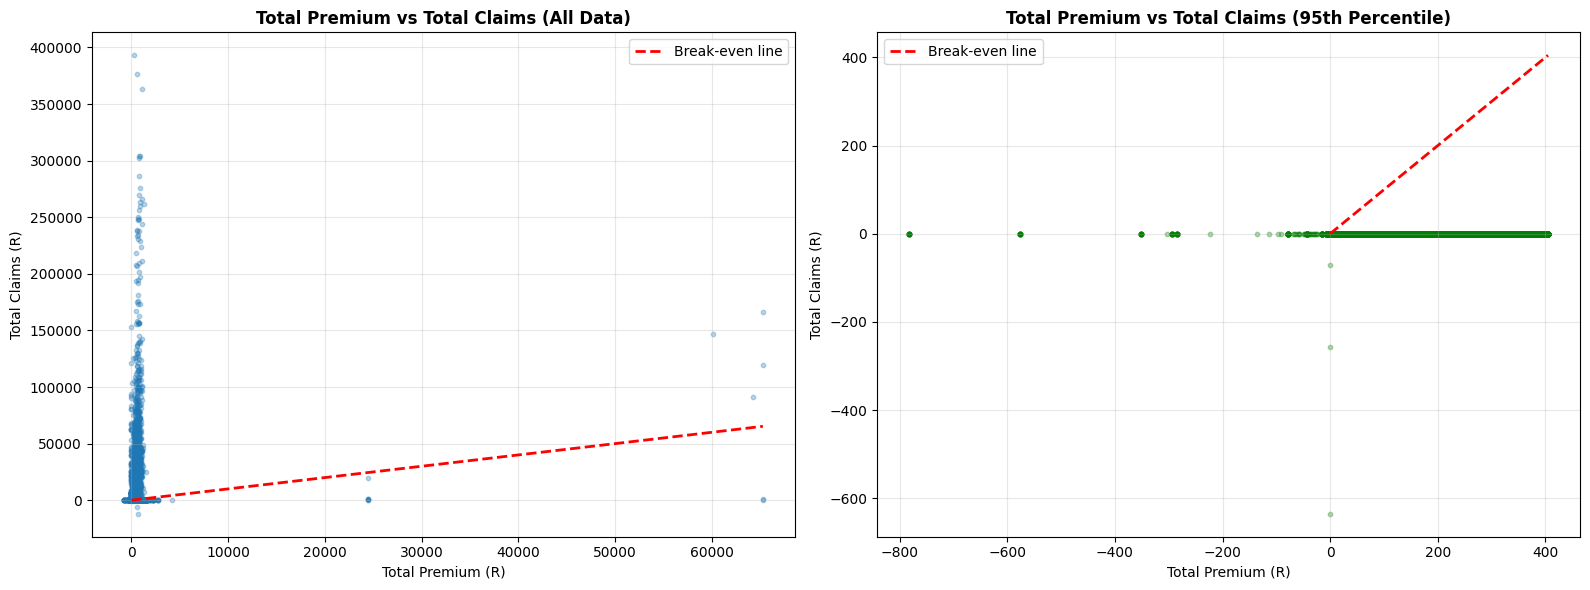


Correlation between Premium and Claims: 0.122


In [15]:
# Scatter plot: Premium vs Claims
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# All data
axes[0].scatter(clean_df['TotalPremium'], clean_df['TotalClaims'], alpha=0.3, s=10)
axes[0].plot([0, clean_df['TotalPremium'].max()], [0, clean_df['TotalPremium'].max()], 
             'r--', label='Break-even line', linewidth=2)
axes[0].set_xlabel('Total Premium (R)')
axes[0].set_ylabel('Total Claims (R)')
axes[0].set_title('Total Premium vs Total Claims (All Data)', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Zoomed view (removing extreme outliers)
q95_premium = clean_df['TotalPremium'].quantile(0.95)
q95_claims = clean_df['TotalClaims'].quantile(0.95)
clean_df_filtered = clean_df[(clean_df['TotalPremium'] <= q95_premium) & (clean_df['TotalClaims'] <= q95_claims)]

axes[1].scatter(clean_df_filtered['TotalPremium'], clean_df_filtered['TotalClaims'], alpha=0.3, s=10, color='green')
axes[1].plot([0, clean_df_filtered['TotalPremium'].max()], [0, clean_df_filtered['TotalPremium'].max()], 
             'r--', label='Break-even line', linewidth=2)
axes[1].set_xlabel('Total Premium (R)')
axes[1].set_ylabel('Total Claims (R)')
axes[1].set_title('Total Premium vs Total Claims (95th Percentile)', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation
corr = clean_df['TotalPremium'].corr(clean_df['TotalClaims'])
print(f"\nCorrelation between Premium and Claims: {corr:.3f}")

MONTHLY TRENDS


TransactionMonth  TotalPremium   TotalClaims  PolicyID  LossRatio  \
0           2013-10  3.710635e+02  0.000000e+00        45   0.000000   
1           2013-11  2.130747e+04  5.058508e+04      1196   2.374054   
2           2013-12  4.248475e+04  9.283386e+03      1495   0.218511   
3           2014-01  5.408520e+04  1.243686e+04      1827   0.229949   
4           2014-02  6.078844e+04  6.298931e+04      2062   1.036205   
5           2014-03  9.857719e+04  3.227850e+05      3466   3.274439   
6           2014-04  2.342743e+05  3.068636e+05      6919   1.309847   
7           2014-05  3.759117e+05  5.180427e+05      9484   1.378097   
8           2014-06  4.862194e+05  5.045364e+05     11822   1.037672   
9           2014-07  6.092661e+05  4.289822e+05     14907   0.704097   
10          2014-08  9.074381e+05  6.934197e+05     19626   0.764151   
11          2014-09  1.237522e+06  9.089024e+05     25990   0.734454   
12          2014-10  1.670355e+06  1.764693e+06     33820   1.056478   
13          2014-11  2.805406e+06  3.794245e+06     48248   1.352476   
14          2014-12  3.859253e+06  6.237473e+06     62457   1.616239   
15          2015-01  4.315628e+06  5.494524e+06     71576   1.273169   
16          2015-02  5.184930e+06  6.267653e+06     83198   1.208821   
17          2015-03  6.002282e+06  7.474981e+06     92015   1.245357   
18          2015-04  6.500269e+06  9.076825e+06     96563   1.396377   
19          2015-05  6.400050e+06  6.963110e+06     99898   1.087977   
20          2015-06  6.737930e+06  6.204182e+06    102594   0.920785   
21          2015-07  7.026171e+06  6.751214e+06    104143   0.960867   
22          2015-08  7.281043e+06  1.019819e+06    106747   0.140065   

    AvgPremium   AvgClaim  
0     8.245856   0.000000  
1    17.815608  42.295217  
2    28.417892   6.209623  
3    29.603282   6.807258  
4    29.480328  30.547676  
5    28.441198  93.128973  
6    33.859566  44.350859  
7    39.636411  54.622811  
8    41.128354  42.677753  
9    40.871142  28.777234  
10   46.236530  35.331688  
11   47.615307  34.971237  
12   49.389565  52.178981  
13   58.145536  78.640464  
14   61.790555  99.868279  
15   60.294349  76.764888  
16   62.320372  75.334178  
17   65.231557  81.236553  
18   67.316354  93.998999  
19   64.065851  69.702195  
20   65.675670  60.473143  
21   67.466572  64.826388  
22   68.208407   9.553607

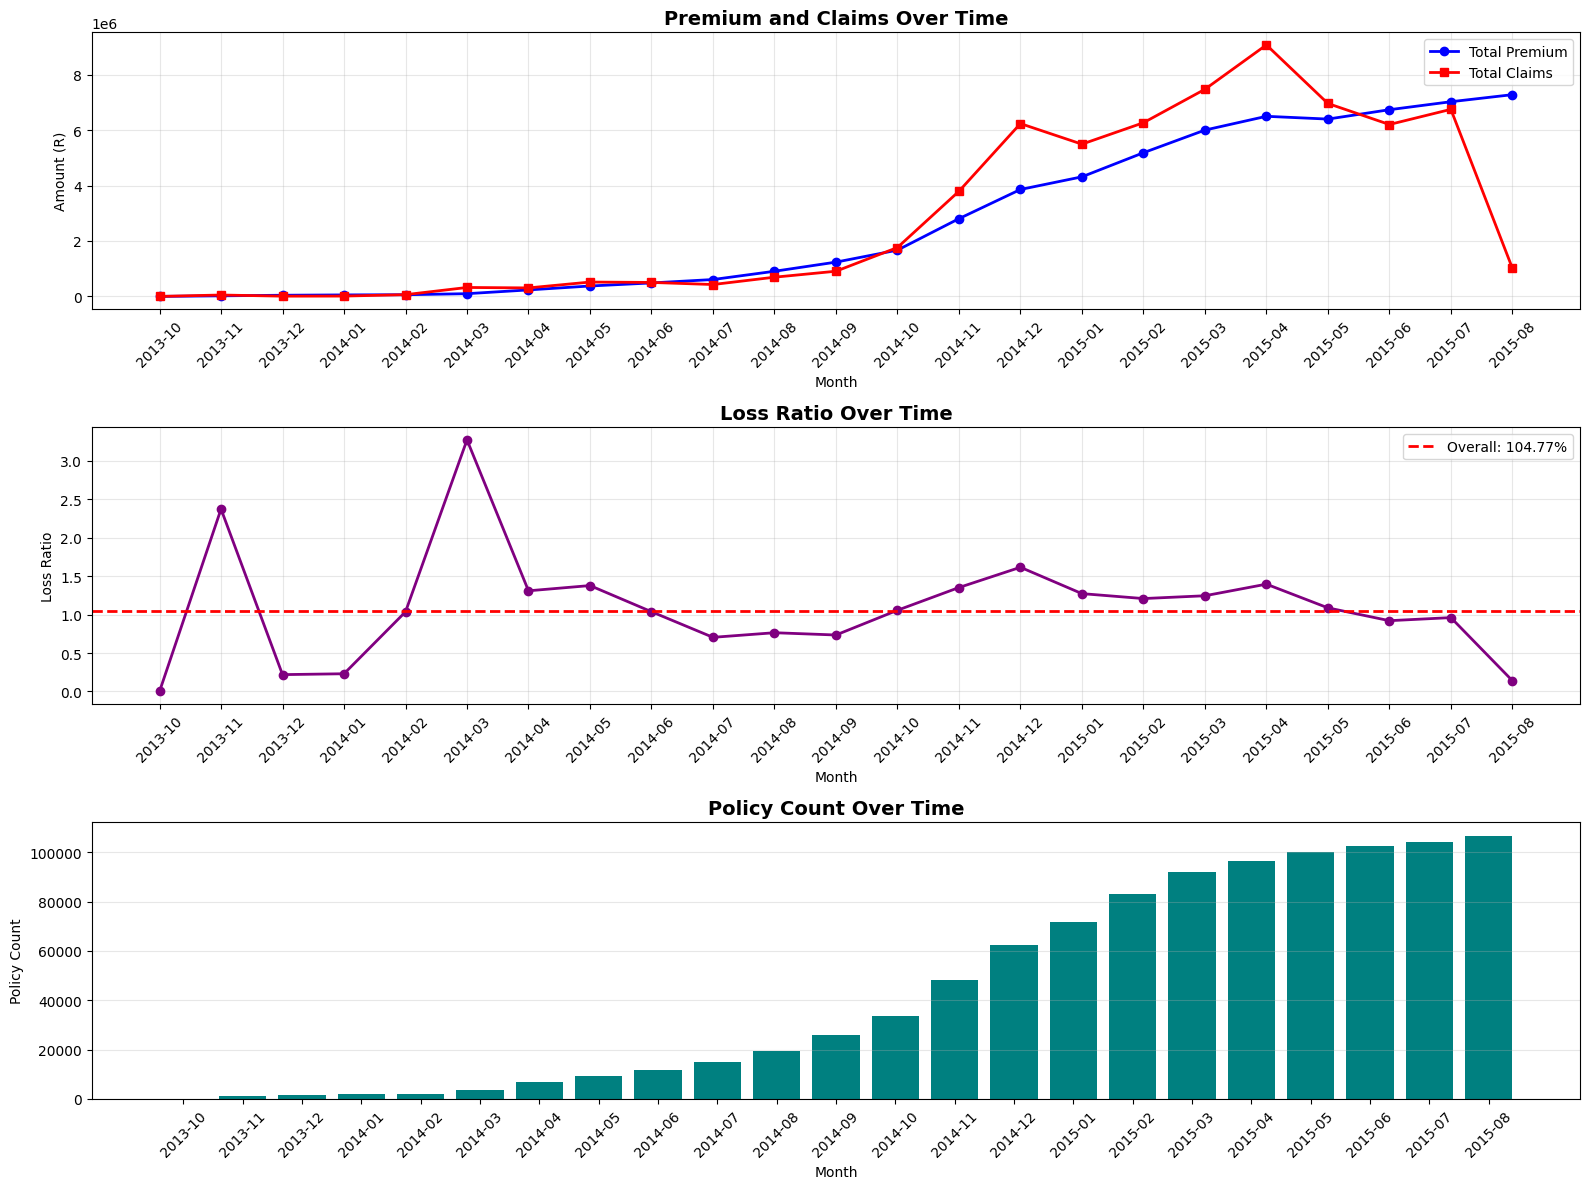

In [16]:
# Monthly trends analysis
if 'TransactionMonth' in clean_df.columns and clean_df['TransactionMonth'].dtype == 'datetime64[ns]':
    
    monthly_data = clean_df.groupby(clean_df['TransactionMonth'].dt.to_period('M')).agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    monthly_data['TransactionMonth'] = monthly_data['TransactionMonth'].astype(str)
    monthly_data['LossRatio'] = monthly_data['TotalClaims'] / monthly_data['TotalPremium']
    monthly_data['AvgPremium'] = monthly_data['TotalPremium'] / monthly_data['PolicyID']
    monthly_data['AvgClaim'] = monthly_data['TotalClaims'] / monthly_data['PolicyID']
    
    print("="*80)
    print("MONTHLY TRENDS")
    print("="*80)
    display(monthly_data)
    
    # Visualize
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    
    # Premium and Claims over time
    axes[0].plot(monthly_data['TransactionMonth'], monthly_data['TotalPremium'], 
                 marker='o', linewidth=2, label='Total Premium', color='blue')
    axes[0].plot(monthly_data['TransactionMonth'], monthly_data['TotalClaims'], 
                 marker='s', linewidth=2, label='Total Claims', color='red')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Amount (R)')
    axes[0].set_title('Premium and Claims Over Time', fontweight='bold', fontsize=14)
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(alpha=0.3)
    
    # Loss Ratio over time
    axes[1].plot(monthly_data['TransactionMonth'], monthly_data['LossRatio'], 
                 marker='o', linewidth=2, color='purple')
    axes[1].axhline(y=overall_loss_ratio, color='red', linestyle='--', linewidth=2,
                    label=f'Overall: {overall_loss_ratio:.2%}')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Loss Ratio')
    axes[1].set_title('Loss Ratio Over Time', fontweight='bold', fontsize=14)
    axes[1].legend()
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(alpha=0.3)
    
    # Policy Count over time
    axes[2].bar(monthly_data['TransactionMonth'], monthly_data['PolicyID'], color='teal')
    axes[2].set_xlabel('Month')
    axes[2].set_ylabel('Policy Count')
    axes[2].set_title('Policy Count Over Time', fontweight='bold', fontsize=14)
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("TransactionMonth not available or not in datetime format")

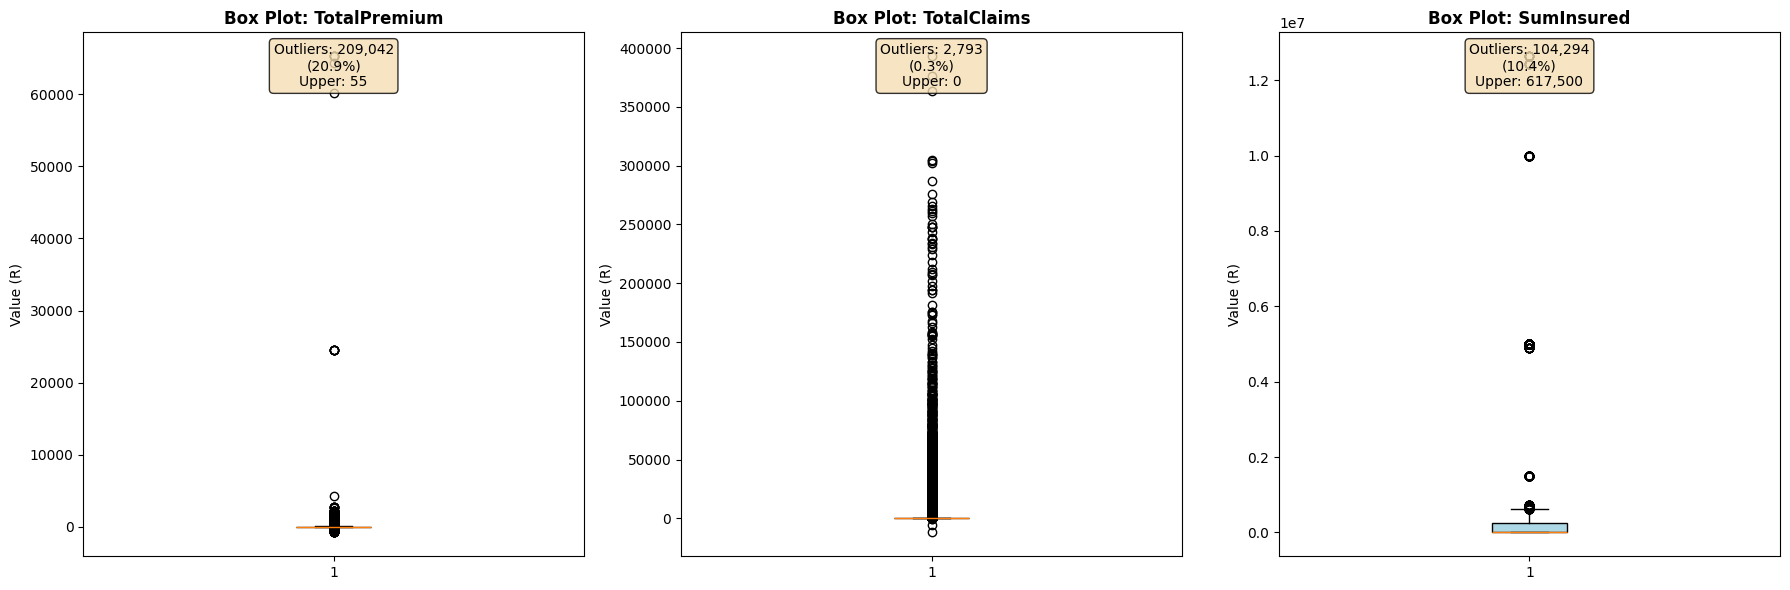


OUTLIER DETECTION SUMMARY


Feature      Q1             Q3            IQR    Lower Bound  \
0  TotalPremium     0.0      21.929825      21.929825     -32.894737   
1   TotalClaims     0.0       0.000000       0.000000       0.000000   
2    SumInsured  5000.0  250000.000000  245000.000000 -362500.000000   

     Upper Bound  Outliers  Outlier %  
0      54.824561    209042  20.902152  
1       0.000000      2793   0.279273  
2  617500.000000    104294  10.428378

In [17]:
# Outlier detection using box plots and IQR method
key_features = ['TotalPremium', 'TotalClaims', 'SumInsured']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

outlier_summary = []

for idx, col in enumerate(key_features):
    if col in clean_df.columns:
        data = clean_df[col].dropna()
        
        # Box plot
        bp = axes[idx].boxplot(data, vert=True, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        axes[idx].set_ylabel('Value (R)')
        axes[idx].set_title(f'Box Plot: {col}', fontweight='bold')
        
        # Calculate outliers using IQR method
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((data < lower_bound) | (data > upper_bound)).sum()
        outlier_percentage = (outliers / len(data)) * 100
        
        outlier_summary.append({
            'Feature': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outliers': outliers,
            'Outlier %': outlier_percentage
        })
        
        # Add text box
        textstr = f'Outliers: {outliers:,}\n({outlier_percentage:.1f}%)\nUpper: {upper_bound:,.0f}'
        axes[idx].text(0.5, 0.98, textstr, transform=axes[idx].transAxes,
                      verticalalignment='top', horizontalalignment='center',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Display outlier summary
print("\n" + "="*80)
print("OUTLIER DETECTION SUMMARY")
print("="*80)
outlier_clean_df = pd.DataFrame(outlier_summary)
display(outlier_clean_df)

In [18]:
# Interactive heatmap: Province vs Vehicle Type
province_vehicle_analysis = clean_df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

province_vehicle_analysis['LossRatio'] = (
    province_vehicle_analysis['TotalClaims'] / province_vehicle_analysis['TotalPremium']
)

# Pivot for heatmap
pivot_data = province_vehicle_analysis.pivot(
    index='Province', 
    columns='VehicleType', 
    values='LossRatio'
)

# Create interactive heatmap
fig = px.imshow(
    pivot_data,
    labels=dict(x="Vehicle Type", y="Province", color="Loss Ratio"),
    title="<b>Loss Ratio Heatmap: Province vs Vehicle Type</b>",
    color_continuous_scale="RdYlGn_r",
    aspect="auto",
    text_auto='.2f'
)

fig.update_layout(
    width=1000,
    height=600,
    font=dict(size=12)
)

fig.show()

print("\n💡 Insight: This heatmap reveals geographic and vehicle-type risk patterns.")
print("Red areas indicate high-risk segments where loss ratios exceed premiums.")


💡 Insight: This heatmap reveals geographic and vehicle-type risk patterns.
Red areas indicate high-risk segments where loss ratios exceed premiums.


In [19]:
# Violin plot for premium distribution by cover type
if 'CoverType' in clean_df.columns:
    top_cover_types = clean_df['CoverType'].value_counts().head(6).index
    
    fig = go.Figure()
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']
    
    for idx, cover_type in enumerate(top_cover_types):
        data = df[df['CoverType'] == cover_type]['TotalPremium']
        
        fig.add_trace(go.Violin(
            y=data,
            name=cover_type,
            box_visible=True,
            meanline_visible=True,
            fillcolor=colors[idx],
            opacity=0.6,
            x0=cover_type
        ))
    
    fig.update_layout(
        title="<b>Premium Distribution by Cover Type</b><br><sub>Violin plots show distribution shape and statistics</sub>",
        yaxis_title="Total Premium (R)",
        xaxis_title="Cover Type",
        showlegend=True,
        height=700,
        width=1200,
        font=dict(size=12)
    )
    
    fig.show()
    
    print("\n💡 Insight: Violin plots reveal the full distribution of premiums.")
    print("Wider sections indicate more policies at that premium level.")


💡 Insight: Violin plots reveal the full distribution of premiums.
Wider sections indicate more policies at that premium level.


In [21]:
# Risk-Return analysis by postal code (bubble chart)
# Analyze by PostalCode
postal_analysis = df.groupby('PostalCode').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

postal_analysis.columns = ['PostalCode', 'TotalPremium', 'TotalClaims', 'PolicyCount']
postal_analysis['LossRatio'] = postal_analysis['TotalClaims'] / postal_analysis['TotalPremium']
postal_analysis['AvgPremium'] = postal_analysis['TotalPremium'] / postal_analysis['PolicyCount']
postal_analysis['AvgClaim'] = postal_analysis['TotalClaims'] / postal_analysis['PolicyCount']

# Filter for postal codes with at least 50 policies
postal_analysis_filtered = postal_analysis[postal_analysis['PolicyCount'] >= 50]

# Top and bottom postal codes by loss ratio
top_loss_postal = postal_analysis_filtered.nlargest(10, 'LossRatio')
bottom_loss_postal = postal_analysis_filtered.nsmallest(10, 'LossRatio')


# Filter for postal codes with sufficient data
postal_bubble = postal_analysis[postal_analysis['PolicyCount'] >= 50].copy()

# Create size categories for better visualization
postal_bubble['SizeCategory'] = pd.cut(
    postal_bubble['PolicyCount'],
    bins=[0, 100, 500, 1000, 5000, float('inf')],
    labels=['50-100', '100-500', '500-1000', '1000-5000', '5000+']
)

fig = px.scatter(
    postal_bubble,
    x='AvgPremium',
    y='LossRatio',
    size='PolicyCount',
    color='LossRatio',
    hover_data={
        'PostalCode': True,
        'PolicyCount': ':,',
        'AvgPremium': ':,.0f',
        'LossRatio': ':.2%',
        'TotalClaims': ':,.0f'
    },
    title="<b>Risk-Return Analysis by Postal Code</b><br><sub>Bubble size represents number of policies</sub>",
    labels={
        'AvgPremium': 'Average Premium (R)',
        'LossRatio': 'Loss Ratio',
        'PolicyCount': 'Policy Count'
    },
    color_continuous_scale="RdYlGn_r",
    size_max=60
)

# Add reference lines
fig.add_hline(
    y=overall_loss_ratio,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Overall Loss Ratio: {overall_loss_ratio:.2%}",
    annotation_position="right"
)

fig.add_hline(
    y=1.0,
    line_dash="dot",
    line_color="black",
    annotation_text="Break-even (Loss Ratio = 1.0)",
    annotation_position="right"
)

fig.update_layout(
    width=1200,
    height=700,
    font=dict(size=12)
)

fig.show()

print("\n💡 Insight: This bubble chart identifies profitable vs risky postal codes.")
print("🟢 Green zones (low loss ratio) = Low-risk, profitable segments")
print("🔴 Red zones (high loss ratio) = High-risk segments requiring premium adjustment")


💡 Insight: This bubble chart identifies profitable vs risky postal codes.
🟢 Green zones (low loss ratio) = Low-risk, profitable segments
🔴 Red zones (high loss ratio) = High-risk segments requiring premium adjustment


In [24]:
# Generate comprehensive summary
print("="*80)
print("📊 COMPREHENSIVE EDA SUMMARY REPORT")
print("="*80)

summary_report = f"""
DATASET OVERVIEW:
- Total Records: {len(clean_df):,}
- Total Features: {len(clean_df.columns)}
- Date Range: {clean_df['TransactionMonth'].min()} to {clean_df['TransactionMonth'].max()}
- Memory Usage: {clean_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

FINANCIAL METRICS:
- Total Premium Collected: R {total_premium:,.2f}
- Total Claims Paid: R {total_claims:,.2f}
- Overall Loss Ratio: {overall_loss_ratio:.2%}
- Net Profit/Loss: R {(total_premium - total_claims):,.2f}

POLICY STATISTICS:
- Total Policies: {len(clean_df):,}
- Policies with Claims: {(clean_df['TotalClaims'] > 0).sum():,} ({(clean_df['TotalClaims'] > 0).mean()*100:.2f}%)
- Policies without Claims: {(clean_df['TotalClaims'] == 0).sum():,} ({(clean_df['TotalClaims'] == 0).mean()*100:.2f}%)
- Avg Premium per Policy: R {clean_df['TotalPremium'].mean():,.2f}
- Avg Claim per Policy: R {clean_df['TotalClaims'].mean():,.2f}

GEOGRAPHIC COVERAGE:
- Provinces: {clean_df['Province'].nunique()}
- Postal Codes: {clean_df['PostalCode'].nunique()}
- Most Policies: {clean_df['Province'].value_counts().index[0]} ({clean_df['Province'].value_counts().values[0]:,} policies)

VEHICLE DIVERSITY:
- Vehicle Types: {clean_df['VehicleType'].nunique()}
- Makes: {clean_df['Make'].nunique() if 'Make' in clean_df.columns else 'N/A'}
- Most Common Type: {clean_df['VehicleType'].value_counts().index[0]}

DATA QUALITY:
- Missing Data: {(clean_df.isnull().sum().sum() / (clean_df.shape[0] * clean_df.shape[1])) * 100:.2f}%
- Duplicate Records: {clean_df.duplicated().sum():,}

KEY FINDINGS:
"""

print(summary_report)

# Key findings based on loss ratios
if loss_by_province['LossRatio'].max() > overall_loss_ratio * 1.2:
    worst_province = loss_by_province.iloc[0]
    print(f"⚠️  HIGH RISK: {worst_province['Province']} shows {worst_province['LossRatio']:.2%} loss ratio")
    print(f"   ({(worst_province['LossRatio'] - overall_loss_ratio)*100:.1f}% above overall average)")

if loss_by_province['LossRatio'].min() < overall_loss_ratio * 0.8:
    best_province = loss_by_province.iloc[-1]
    print(f"✅ LOW RISK: {best_province['Province']} shows {best_province['LossRatio']:.2%} loss ratio")
    print(f"   ({(overall_loss_ratio - best_province['LossRatio'])*100:.1f}% below overall average)")

print("\n" + "="*80)

📊 COMPREHENSIVE EDA SUMMARY REPORT

DATASET OVERVIEW:
- Total Records: 1,000,098
- Total Features: 52
- Date Range: 2013-10-01 00:00:00 to 2015-08-01 00:00:00
- Memory Usage: 2007.41 MB

FINANCIAL METRICS:
- Total Premium Collected: R 61,911,562.70
- Total Claims Paid: R 64,867,546.17
- Overall Loss Ratio: 104.77%
- Net Profit/Loss: R -2,955,983.47

POLICY STATISTICS:
- Total Policies: 1,000,098
- Policies with Claims: 2,788 (0.28%)
- Policies without Claims: 997,305 (99.72%)
- Avg Premium per Policy: R 61.91
- Avg Claim per Policy: R 64.86

GEOGRAPHIC COVERAGE:
- Provinces: 9
- Postal Codes: 888
- Most Policies: Gauteng (393,865 policies)

VEHICLE DIVERSITY:
- Vehicle Types: 5
- Makes: N/A
- Most Common Type: Passenger Vehicle

DATA QUALITY:
- Missing Data: 9.74%
- Duplicate Records: 0

KEY FINDINGS:

✅ LOW RISK: Northern Cape shows 28.27% loss ratio
   (76.5% below overall average)



In [25]:
# Create a processed version with new features
df_processed = clean_df.copy()

# Add calculated features
df_processed['LossRatio'] = df_processed['TotalClaims'] / df_processed['TotalPremium']
df_processed['LossRatio'] = df_processed['LossRatio'].replace([np.inf, -np.inf], np.nan)

df_processed['HasClaim'] = (df_processed['TotalClaims'] > 0).astype(int)
df_processed['ProfitMargin'] = df_processed['TotalPremium'] - df_processed['TotalClaims']

if 'RegistrationYear' in df_processed.columns:
    df_processed['VehicleAge'] = 2015 - df_processed['RegistrationYear']

# Export processed data
output_path = '../data/insurance_data_processed.csv'
df_processed.to_csv(output_path, index=False)
print(f"✅ Processed data exported to: {output_path}")
print(f"   Shape: {df_processed.shape}")

✅ Processed data exported to: ../data/insurance_data_processed.csv
   Shape: (1000098, 56)
